In [1]:
import os
from tensorflow.keras.preprocessing import image

In [2]:
folders = os.listdir('Train')
print(folders)

['.DS_Store', 'Spearow', 'Squirtle', 'Pikachu', 'Charmander', 'Fearow', 'Aerodactyl', 'Bulbasaur', 'Meowth', 'Psyduck', 'Dratini']


In [3]:
image_data = []
labels = []
count = 0

for folder in folders:
    if not folder.startswith('.'):
        path = os.path.join('Train', folder)
        print(path, count)
        for im in os.listdir(path):
            try:
                img = image.load_img(os.path.join(path,im), target_size = (224,224))
                img_array = image.img_to_array(img)
                image_data.append(img_array)
                labels.append(count)
                
            except Exception as e:
                print(e)

        count += 1

Train/Spearow 0
Train/Squirtle 1
Train/Pikachu 2


/Users/jelena/miniconda3/lib/python3.10/site-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train/Charmander 3
Train/Fearow 4
cannot identify image file <_io.BytesIO object at 0x103700ae0>
cannot identify image file <_io.BytesIO object at 0x14bb3ddf0>
Train/Aerodactyl 5
Train/Bulbasaur 6
Train/Meowth 7
Train/Psyduck 8
Train/Dratini 9


In [4]:
# Shuffle the dataset to avoid overfit

import random

combined_dataset = list(zip(image_data, labels))
random.shuffle(combined_dataset)
image_data[:], labels[:] = zip(*combined_dataset)



In [5]:
import numpy as np
from keras.utils import np_utils

In [6]:
X_train = np.array(image_data)
Y_train = np.array(labels)

# Convert labels to One Hot Encodings
Y_train = np_utils.to_categorical(Y_train)

In [7]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model


In [8]:
model = ResNet50(include_top = False, weights = 'imagenet', input_shape = (224,224,3))
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

## Building our classifier

In [9]:
# Building our classifier

av1 = GlobalAveragePooling2D()(model.output)

fc1 = Dense(256, activation = 'relu')(av1)

d1 = Dropout(0.5)(fc1)

fc2 = Dense(10, activation = 'softmax')(d1)

## Perform the feature extractor strategy

In [10]:
model_new = Model(inputs = model.input, outputs = fc2)
model_new.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

## Make predictions

In [11]:
from tensorflow.keras.applications.resnet50 import preprocess_input

In [12]:
image_path = 'pikachu.png'
img = image.load_img(image_path, target_size = (224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
x = preprocess_input(x)

In [13]:
pred = model_new.predict(x)
print(np.argmax(pred))

2023-02-01 21:15:35.105945: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 468ms/step
6


In [14]:
image_path = 'pikachu_1.png'
img = image.load_img(image_path, target_size = (224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
x = preprocess_input(x)

pred = model_new.predict(x)
print(np.argmax(pred))

1/1 [==============================] - 0s 53ms/step
1


In [15]:
image_path = 'squirtle.png'
img = image.load_img(image_path, target_size = (224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
x = preprocess_input(x)

pred = model_new.predict(x)
print(np.argmax(pred))

1/1 [==============================] - 0s 55ms/step
7


## Compile the new model

In [17]:
model_new.compile(optimizer = Adam(learning_rate = 0.00003),loss = 'categorical_crossentropy', metrics= ['accuracy'])

## Fine-tune the new model

In [19]:
for ix in range(len(model_new.layers)):
    print(ix, model_new.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x14becad10>
1 <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x14e193ee0>
2 <keras.layers.convolutional.conv2d.Conv2D object at 0x1036a9120>
3 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x14fc3d660>
4 <keras.layers.core.activation.Activation object at 0x14fc3e740>
5 <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x14fce7100>
6 <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x14fd1c2e0>
7 <keras.layers.convolutional.conv2d.Conv2D object at 0x14fd1f190>
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x14fc3d4b0>
9 <keras.layers.core.activation.Activation object at 0x14fce52a0>
10 <keras.layers.convolutional.conv2d.Conv2D object at 0x14fd57100>
11 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x14fd572e0>
12 <keras.layers.core.activation.Activation object at 0x14fd72bf0>
13 <keras.layers.convolutional

In [20]:
# Let's decide up to which layer we want to freeze the weight update process. 
# The leyers from 0 to 168 set to be non-trainable
for ix in range(169):
    model_new.layers[ix].trainable = False
print(model_new.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

## Train the model

In [21]:
# The model will not update the weights of the complete network, rather only for those 
# whose trainable value is True.

hist = model_new.fit(X_train, Y_train, shuffle = True, batch_size = 16,
                    epochs = 8, validation_split = 0.2)

Epoch 1/8
83/83 [==============================] - 178s 2s/step - loss: 1.7279 - accuracy: 0.4415 - val_loss: 0.7362 - val_accuracy: 0.7781
Epoch 2/8
83/83 [==============================] - 180s 2s/step - loss: 0.5784 - accuracy: 0.8374 - val_loss: 0.3461 - val_accuracy: 0.8967
Epoch 3/8
83/83 [==============================] - 189s 2s/step - loss: 0.2781 - accuracy: 0.9316 - val_loss: 0.2493 - val_accuracy: 0.9240
Epoch 4/8
83/83 [==============================] - 194s 2s/step - loss: 0.1491 - accuracy: 0.9658 - val_loss: 0.2241 - val_accuracy: 0.9483
Epoch 5/8
83/83 [==============================] - 191s 2s/step - loss: 0.1048 - accuracy: 0.9810 - val_loss: 0.1930 - val_accuracy: 0.9453
Epoch 6/8
83/83 [==============================] - 193s 2s/step - loss: 0.0549 - accuracy: 0.9932 - val_loss: 0.1976 - val_accuracy: 0.9422
Epoch 7/8
83/83 [==============================] - 192s 2s/step - loss: 0.0524 - accuracy: 0.9886 - val_loss: 0.1943 - val_accuracy: 0.9453
Epoch 8/8
83/83 [===

In [22]:
image_path = 'squirtle.png'
img = image.load_img(image_path, target_size = (224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
x = preprocess_input(x)

pred = model_new.predict(x)
print(np.argmax(pred))

1/1 [==============================] - 0s 419ms/step
1


In [23]:
image_path = 'pikachu_1.png'
img = image.load_img(image_path, target_size = (224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
x = preprocess_input(x)

pred = model_new.predict(x)
print(np.argmax(pred))

1/1 [==============================] - 0s 72ms/step
2


In [24]:
import matplotlib.pyplot as plt

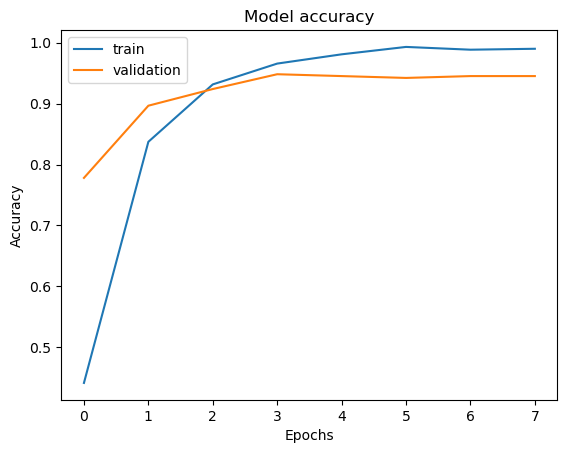

In [25]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])
plt.show()

In [26]:
model_new.save('my_model.h5')

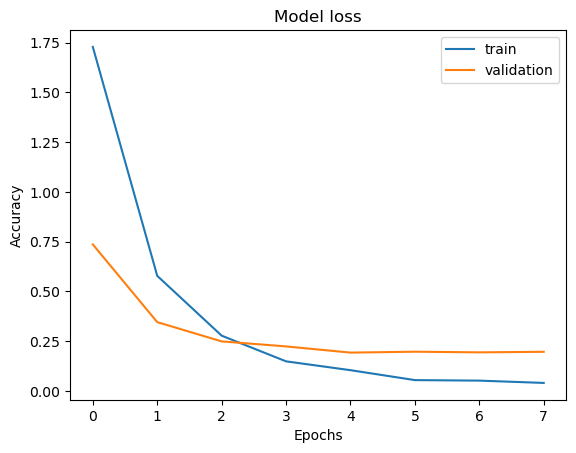

In [27]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])
plt.show()